In [196]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
df = pd.read_csv("BikeSharing.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [198]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [199]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [200]:
df.shape

(730, 16)

In [201]:
df.corr().unstack().sort_values(ascending = False).drop_duplicates()

cnt         cnt           1.000000
temp        atemp         0.991696
registered  cnt           0.945411
instant     yr            0.866026
season      mnth          0.831032
                            ...   
hum         windspeed    -0.248506
workingday  holiday      -0.252948
weathersit  registered   -0.259025
            cnt          -0.295929
workingday  casual       -0.517607
Length: 106, dtype: float64

<AxesSubplot:>

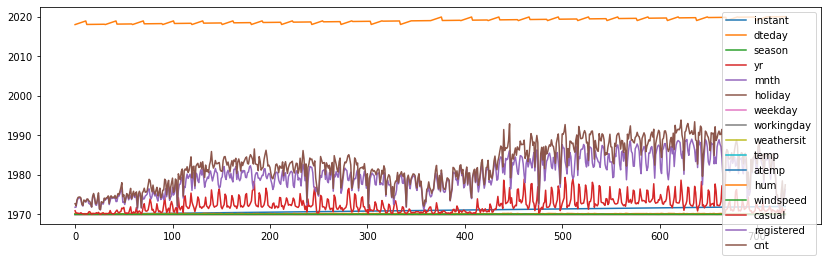

In [202]:
df.plot(figsize=(14, 4))

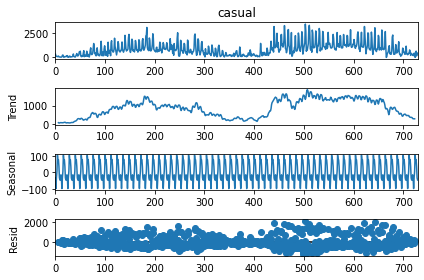

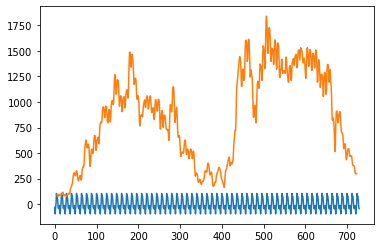

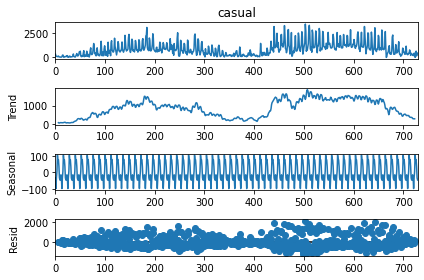

In [203]:
result = seasonal_decompose(df['casual'], model = 'additive', period = 12)
result.seasonal.plot()
result.trend.plot()
result.plot()

In [204]:
adf = adfuller(df.loc[:, 'casual'].values, autolag = 'AIC')
print("ADF Statistic:", adf[0])
print("p-value:", adf[1])
print("n_lags:", adf[2])
for key, value in adf[4].items():
    print("Critical values:", key, value)

ADF Statistic: -1.8051196888076817
p-value: 0.3779228890408486
n_lags: 20
Critical values: 1% -3.439606888036868
Critical values: 5% -2.865625121924057
Critical values: 10% -2.5689454046801052


In [205]:
if(adf[1]<0.05):
    print("Stationary data")
else:
    print("Non-stationary data") 

Non-stationary data


In [206]:
import numpy as np
df1 = df.copy()
df1['dteday'] = np.arange(len(df.index))

df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


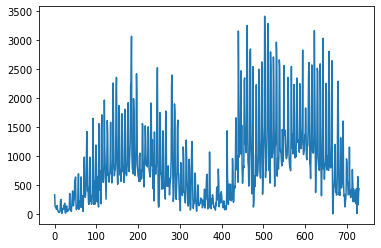

In [207]:
plt.plot("dteday", "casual", data = df1)
plt.show()

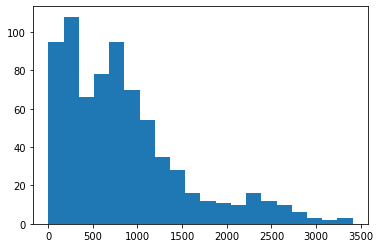

In [208]:
plt.hist(df1['casual'], bins=20)
plt.show()

In [209]:
skew = df1.agg(['skew', 'kurtosis']).transpose()
skew

,skew,kurtosis
instant,0.000000,-1.200000
dteday,0.000000,-1.200000
season,-0.002571,-1.341120
yr,0.000000,-2.005502
mnth,-0.010478,-1.207096
holiday,5.650014,30.004851
weekday,0.002745,-1.256688
workingday,-0.790992,-1.378114
weathersit,0.961855,-0.126895
temp,-0.057187,-1.118305


In [210]:
from numpy import sqrt
transform = df1.copy()
transform['casual'] = sqrt(transform['casual'])

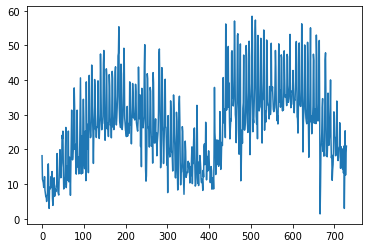

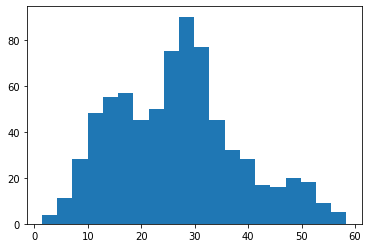

In [211]:
plt.plot("casual", data = transform)
plt.show()

plt.hist(transform['casual'], bins=20)
plt.show()

<AxesSubplot:>

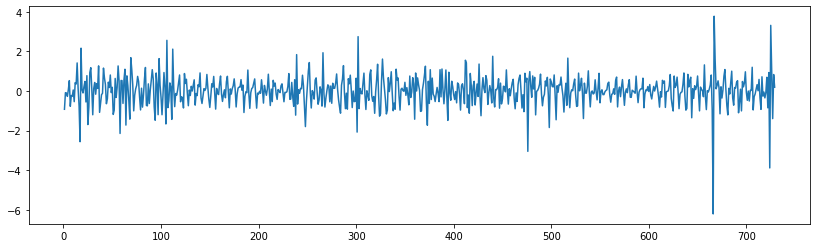

In [212]:
# Log transformation
transformed_df = pd.Series(np.log(df1["casual"])).diff().dropna()
transformed_df.plot(figsize=(14, 4))

In [213]:
from scipy.stats import boxcox

df1['casual'], lam = boxcox(df1['casual'])

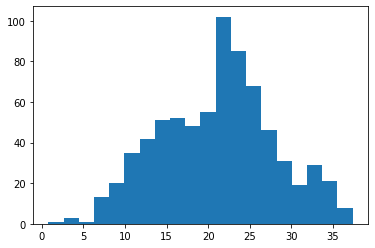

In [214]:
plt.hist(df1['casual'], bins=20)
plt.show()